url : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1                   
downlaod : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier


In [4]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

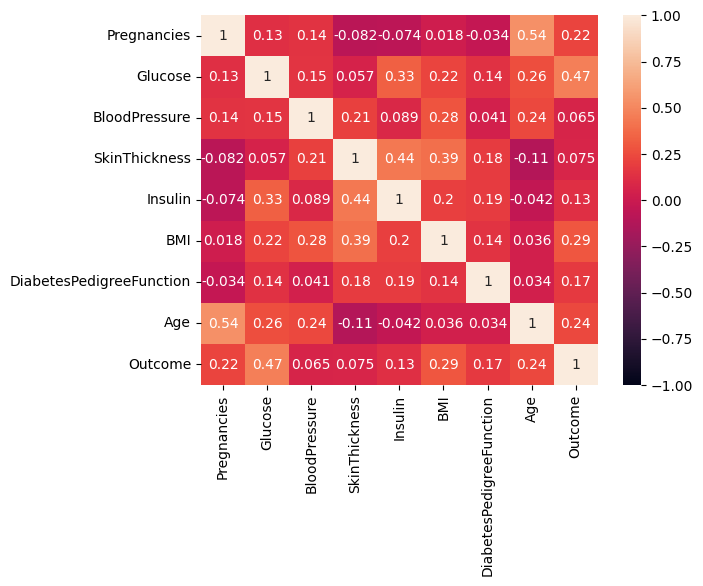

In [10]:
sns.heatmap(data.corr(),annot=True,vmin=-1.0,vmax=1.0)

In [17]:
labels = ['very younger' , 'younger' , 'old', 'very older']
crosse = pd.crosstab(pd.qcut(data['Age'],q=4,labels = labels),data['Outcome'])
av_cross =  crosse[1] / crosse[0] + crosse[1]
crosse = pd.concat([crosse,av_cross],axis=1)
crosse.columns = ['Negative' ,'Positive','AVG']

In [18]:
crosse

,Negative,Positive,AVG
Age,,,
very younger,188,31,31.164894
younger,124,53,53.427419
old,105,95,95.904762
very older,83,89,90.072289


In [22]:
scaler = StandardScaler()
new_fun_data = data.drop('Outcome',axis=1)
scaled_data = pd.DataFrame(scaler.fit_transform(new_fun_data),columns = new_fun_data.columns)

/tmp/ipykernel_32/1855385457.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_data[col],shade=True)
/tmp/ipykernel_32/1855385457.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_data[col],shade=True)
/tmp/ipykernel_32/1855385457.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_data[col],shade=True)
/tmp/ipykernel_32/1855385457.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_data[col],shade=True)
/tmp/ipykernel_32/1855385457.py:2: FutureWarning: 

`shade` is n

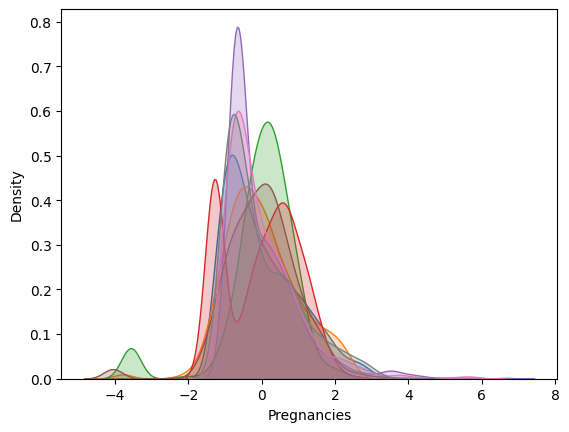

In [23]:
for col in scaled_data.columns:
    sns.kdeplot(scaled_data[col],shade=True)
plt.show()

In [24]:
y = data['Outcome']
x = data.drop('Outcome',axis=1)

In [25]:
x = scaler.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.725,random_state = 7)

In [31]:
model = MLPClassifier(hidden_layer_sizes=(64,64),activation='relu')
model.fit(x_train,y_train)
model.score(x_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7311320754716981

In [35]:
#x.shape
#y.mean()

In [57]:
inputs = tf.keras.Input(shape=(8,))
x = tf.keras.layers.Dense(16,activation='relu')(inputs)
x = tf.keras.layers.Dense(16,activation='relu')(x)

outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs , outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = [tf.keras.metrics.AUC(name='auc')]
)
epochs = 14

hist = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    batch_size=40,
    epochs=epochs
)

Epoch 1/14
12/12 [==============================] - 1s 24ms/step - loss: 0.7738 - auc: 0.3050 - val_loss: 0.7380 - val_auc: 0.3605
Epoch 2/14
12/12 [==============================] - 0s 6ms/step - loss: 0.7272 - auc: 0.3716 - val_loss: 0.7060 - val_auc: 0.4100
Epoch 3/14
12/12 [==============================] - 0s 5ms/step - loss: 0.6926 - auc: 0.4540 - val_loss: 0.6803 - val_auc: 0.4768
Epoch 4/14
12/12 [==============================] - 0s 5ms/step - loss: 0.6637 - auc: 0.5366 - val_loss: 0.6607 - val_auc: 0.5356
Epoch 5/14
12/12 [==============================] - 0s 5ms/step - loss: 0.6390 - auc: 0.6134 - val_loss: 0.6422 - val_auc: 0.5945
Epoch 6/14
12/12 [==============================] - 0s 5ms/step - loss: 0.6153 - auc: 0.6814 - val_loss: 0.6253 - val_auc: 0.6512
Epoch 7/14
12/12 [==============================] - 0s 5ms/step - loss: 0.5923 - auc: 0.7305 - val_loss: 0.6086 - val_auc: 0.6919
Epoch 8/14
12/12 [==============================] - 0s 5ms/step - loss: 0.5710 - auc: 0.7

In [58]:
fig = px.line(
    hist.history,
    y = ['loss','val_loss'],
    labels = {'x':'Epochs','y':'Loss'},
    title = 'training and validation loss'
)
fig.show()

In [59]:
np.argmin(hist.history['val_loss']) + 1

14

In [60]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5112 - auc: 0.8232


[0.5111770033836365, 0.8232322931289673]

### Thank you so much for watching 
##### ***i hope you enjoy :)***